<a href="https://colab.research.google.com/github/Alaa-Awad3/ALL-Diagnosis-Using-DL/blob/main/Acute_Lymphoblastic_Leukemia_Diagnosis_Employing_YOLOv11%2C_YOLOv8%2C_ResNet50%2C_and_Inception_ResNet_v2_Deep_Learning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.4 MB/s eta 0:00:00a 0:00:01


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import keras
from keras.optimizers import AdamW
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.layers import Input, Add, Dense, Activation, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.models import Model, load_model

#YOLOv8

In [ ]:
# Load YOLOv8s model
yolov8_model = YOLO("yolov8s-cls.pt")

In [ ]:
#Set the hyperparameters and train the model
yolov8_training_results = yolov8_model.train(data='/kaggle/input/blood-cancer/data2', epochs=50, augment=True, optimizer='SGD', lr0=0.001, batch=8, imgsz=224, mosaic=1.0, degrees=45.0, fliplr=0.5, scale=0.5)

Ultralytics 8.3.249 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/blood-cancer/data2, degrees=45.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=

2026-01-08 02:04:44,852	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2026-01-08 02:04:45,813	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=1000 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralyti

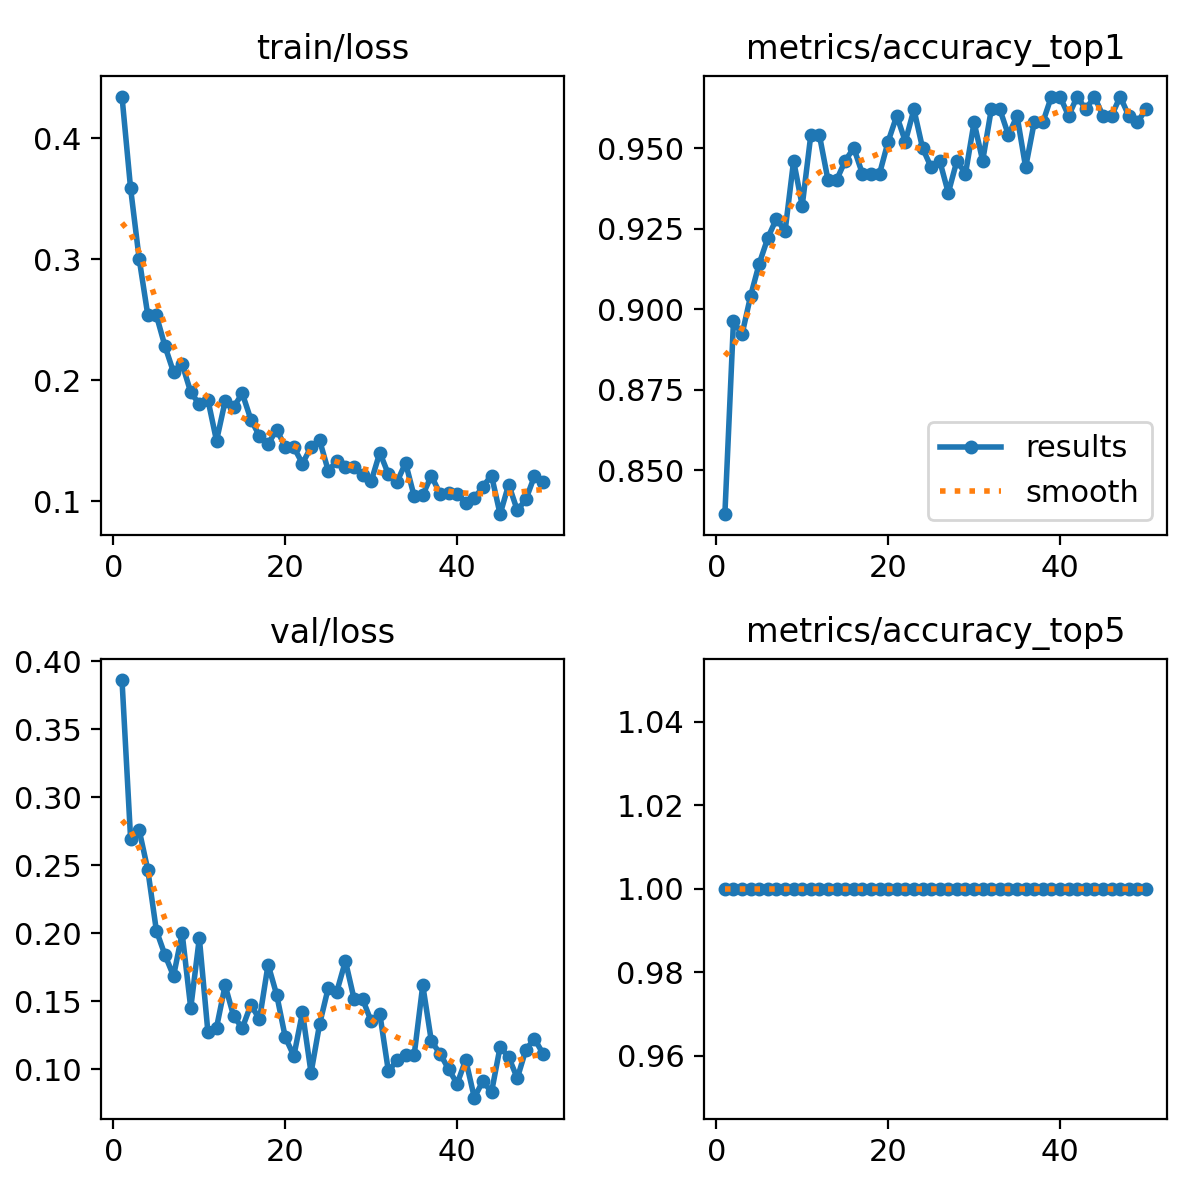

In [ ]:
yolov8_results = '/kaggle/working/runs/classify/train/results.png'
Image(filename=yolov8_results)

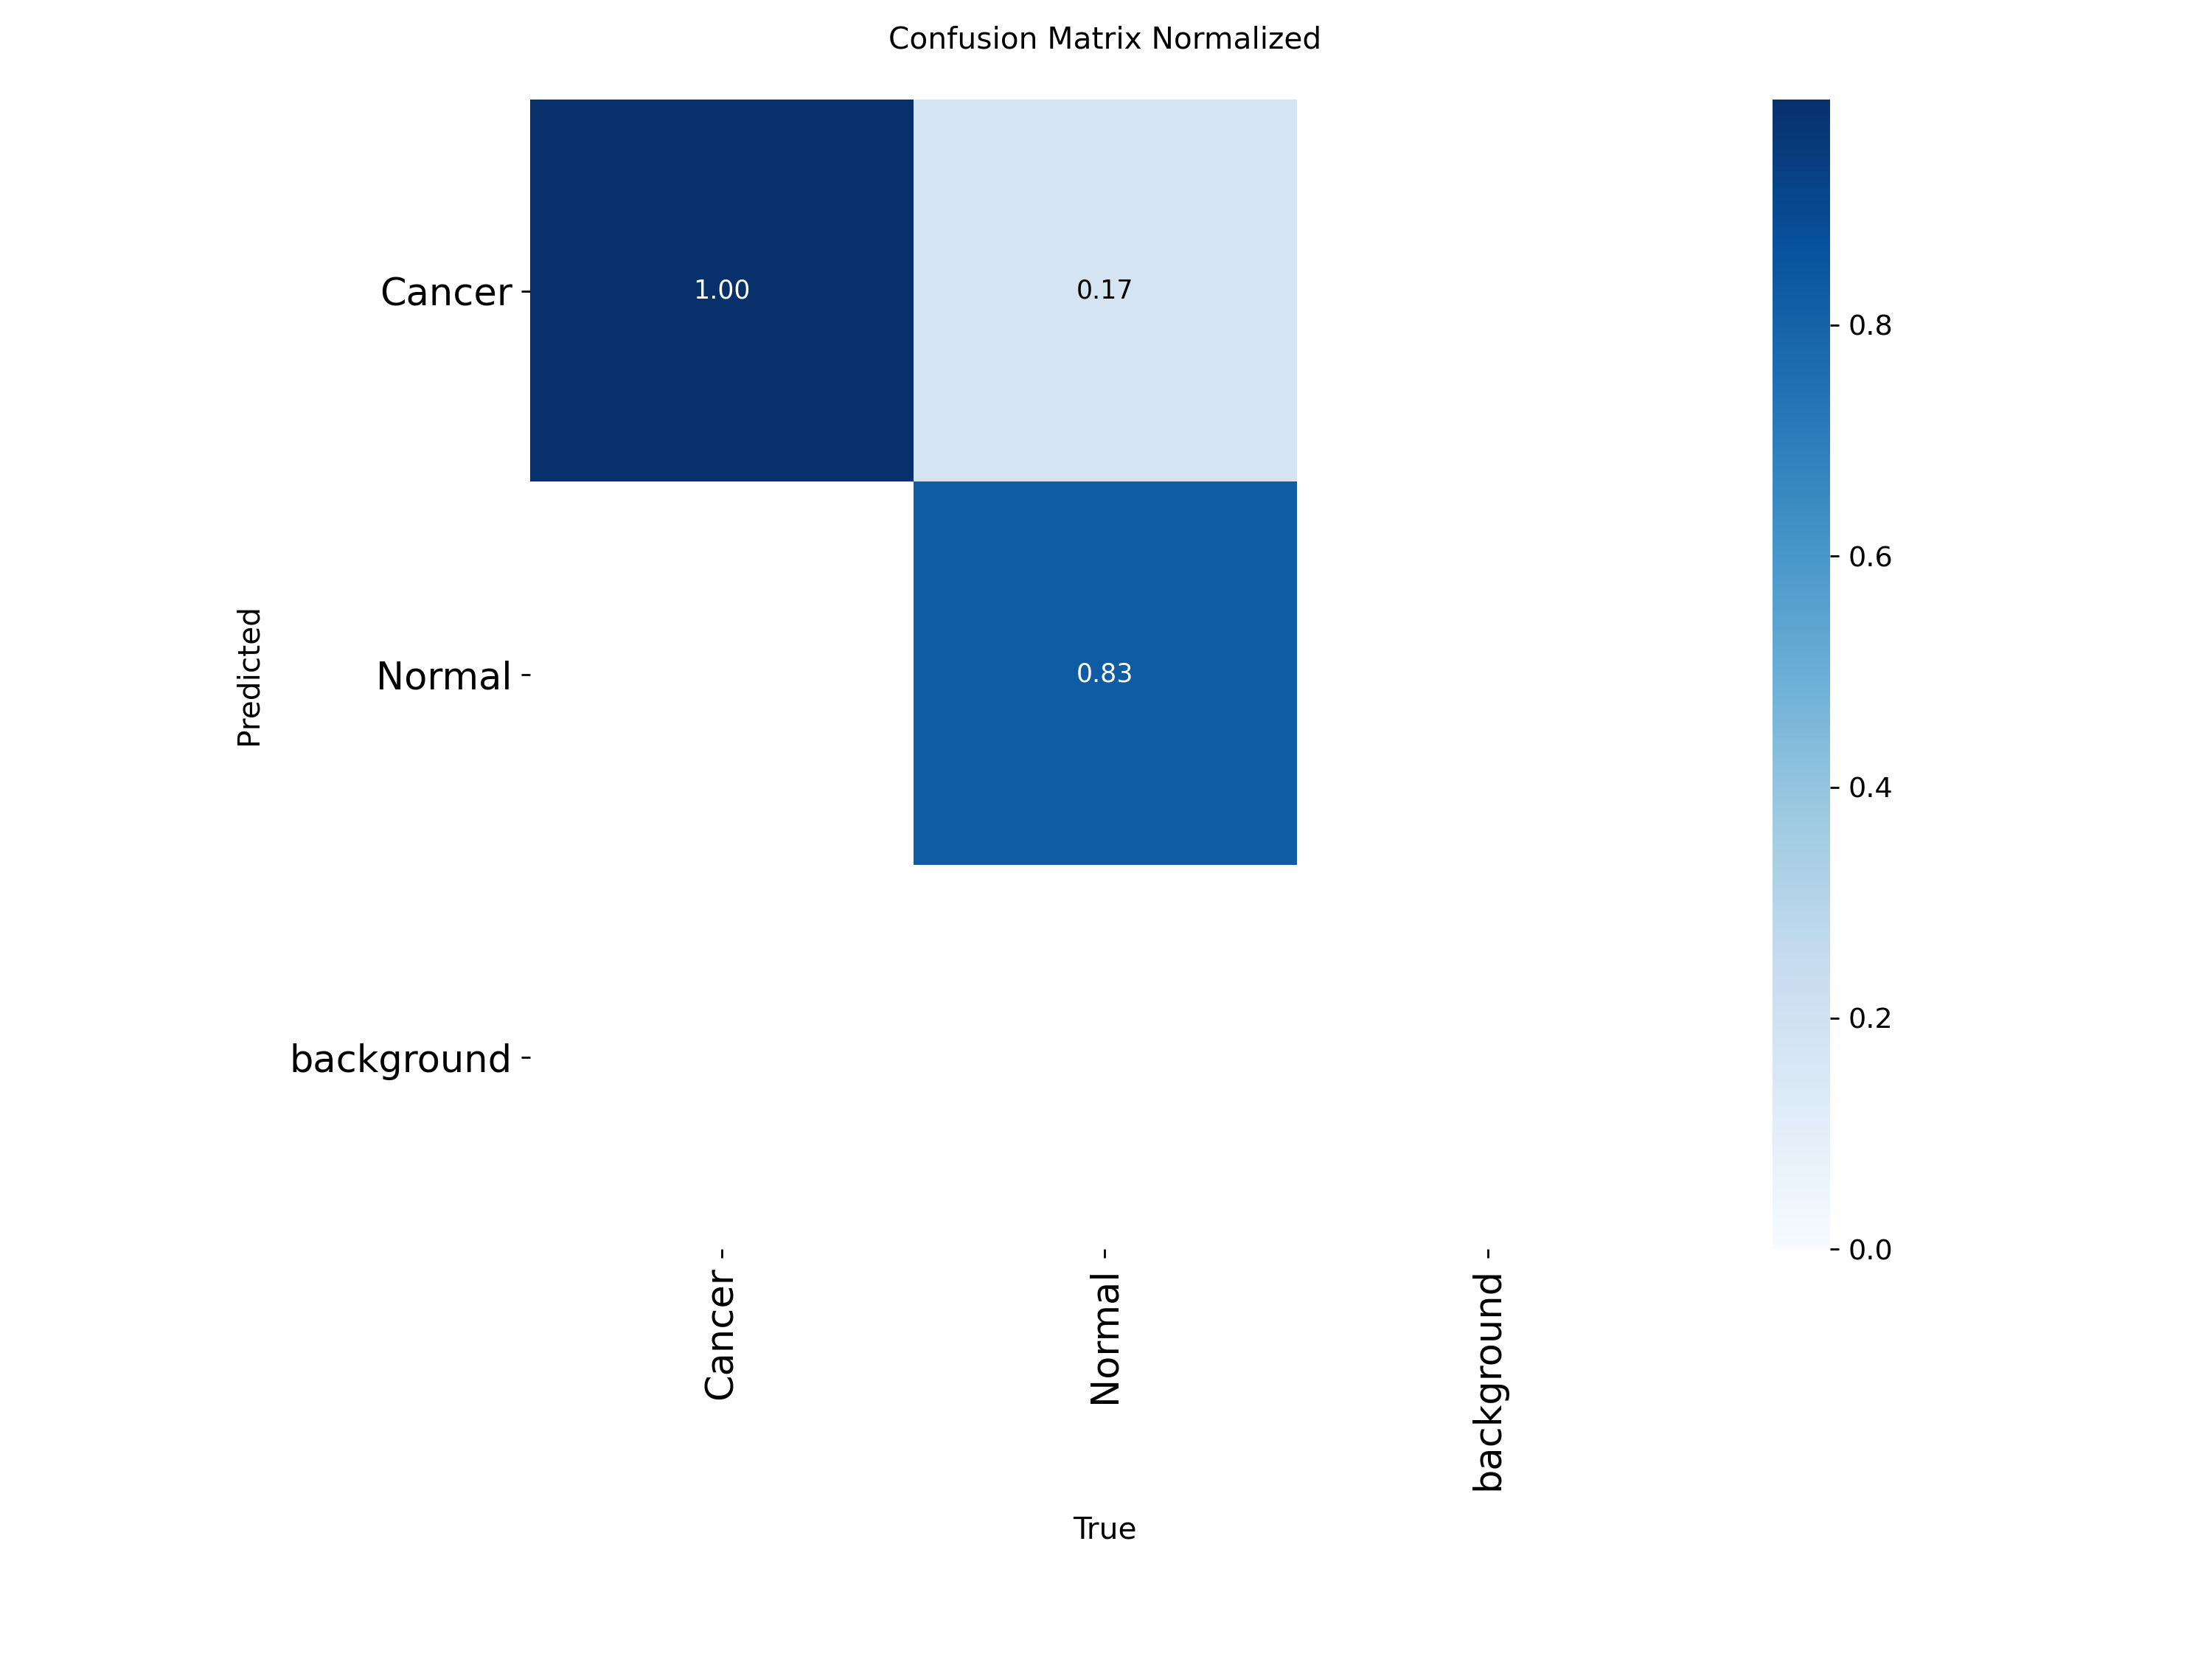

In [ ]:
yolov8_conf_matrix = '/kaggle/working/runs/classify/train/confusion_matrix_normalized.png'
Image(filename=yolov8_conf_matrix)

In [ ]:
#Test the model using the test data
yolov8_model.val(data='/kaggle/input/val-data/val_data/data2')

Ultralytics 8.3.249 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-cls summary (fused): 30 layers, 5,077,762 parameters, 0 gradients, 12.4 GFLOPs
train: /kaggle/input/val-data/val_data/data2/train... found 2352 images in 2 classes ✅ 
val: /kaggle/input/val-data/val_data/data2/val... found 511 images in 2 classes ✅ 
test: None...
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 37.1±17.0 MB/s, size: 301.6 KB)
val: Scanning /kaggle/input/val-data/val_data/data2/val... 511 images, 0 corrupt: 100% ━━━━━━━━━━━━ 511/511 504.3it/s 1.0s<0.0s
WARNING ⚠️ val: Cache directory /kaggle/input/val-data/val_data/data2 is not writable, cache not saved.
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 32/32 18.6it/s 1.7s0.1s
                   all       0.98          1
Speed: 0.1ms preprocess, 1.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /kaggle/working/runs/classify/val


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x798cb03752d0>
curves: []
curves_results: []
fitness: 0.9902152717113495
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.980430543422699, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9902152717113495}
save_dir: PosixPath('/kaggle/working/runs/classify/val')
speed: {'preprocess': 0.1287143600780061, 'inference': 1.053751500979618, 'loss': 0.002293814091586298, 'postprocess': 0.0027605401177560203}
task: 'classify'
top1: 0.980430543422699
top5: 1.0

#YOLOv11n with SGD

In [ ]:
# Load YOLOv11n model
yolov11n_model = YOLO("yolo11n-cls.pt")

In [ ]:
#Set the hyperparameters and train the model
yolov11n_training_resultsfinal  = yolov11n_modelfinal.train(data='/kaggle/input/blood-cancer/data2', epochs=50, batch=32, optimizer='SGD', lr0=0.001, augment=True, mosaic=1.0, degrees =45, fliplr=0.5, scale=0.5)

Ultralytics 8.3.249 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/blood-cancer/data2, degrees=45, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train6, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=

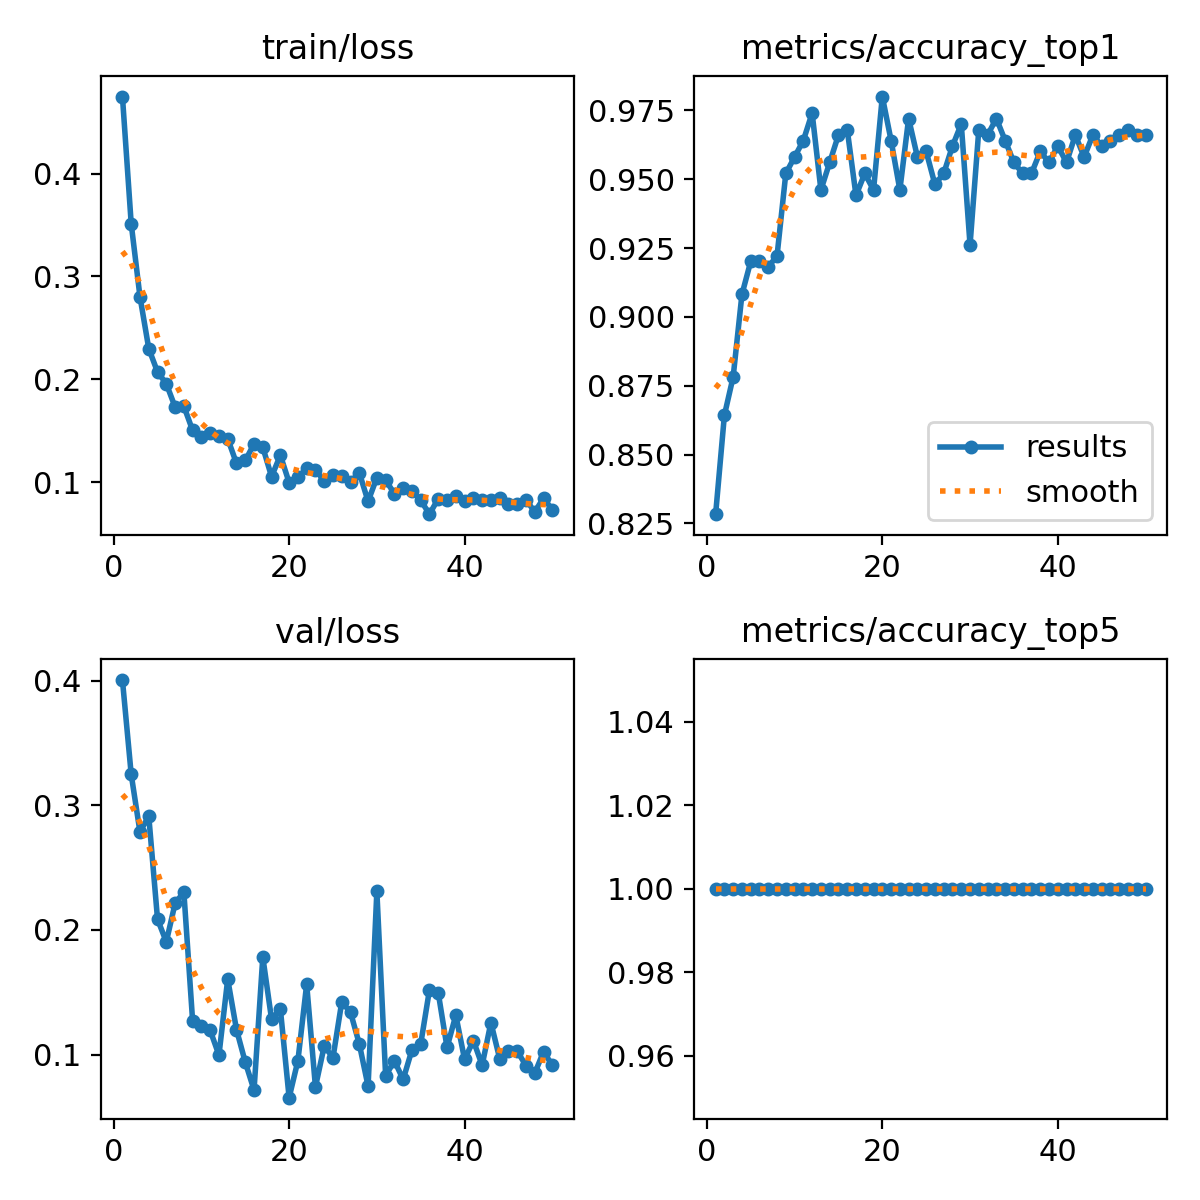

In [ ]:
yolov11n_results = '/kaggle/working/runs/classify/train6/results.png'
Image(filename=yolov11n_results)

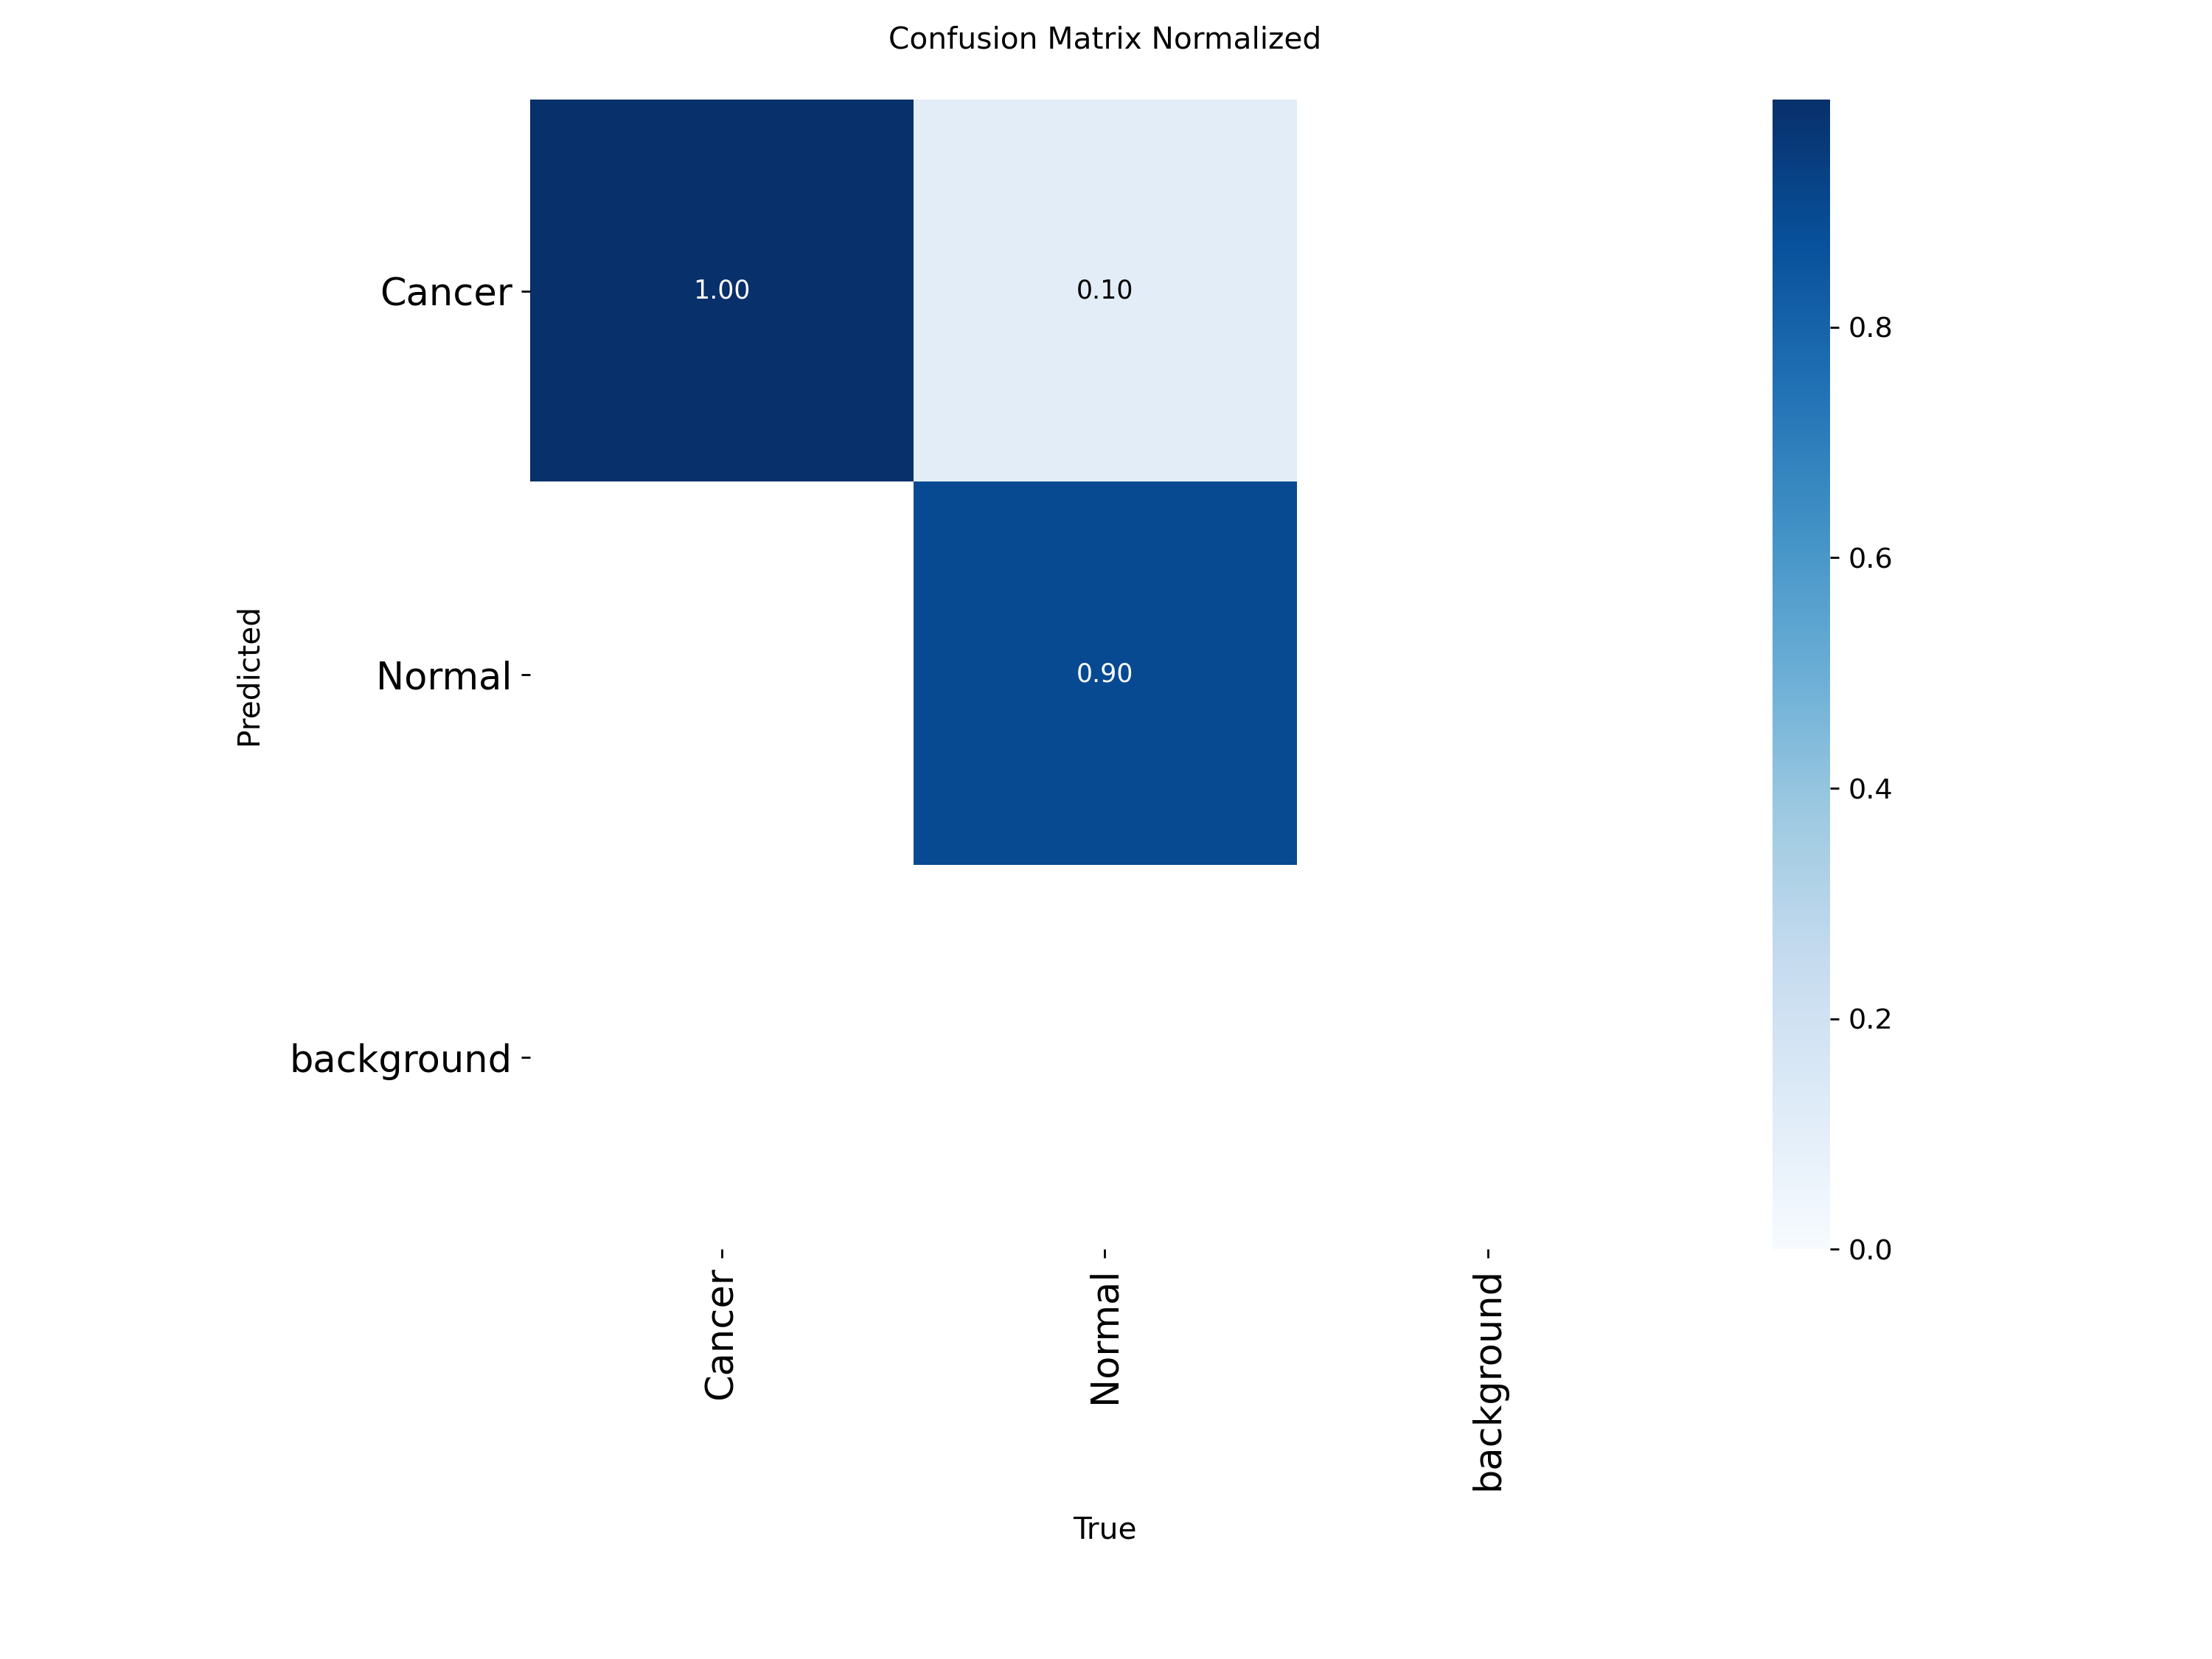

In [ ]:
yolov11n_conf_matrix = '/kaggle/working/runs/classify/train6/confusion_matrix_normalized.png'
Image(filename=yolov11n_conf_matrix)

In [ ]:
#Test the model using the test data

yolov11n_model.val(data='/kaggle/input/val-data/val_data/data2')

Ultralytics 8.3.249 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-cls summary (fused): 47 layers, 1,528,586 parameters, 0 gradients, 3.2 GFLOPs
train: /kaggle/input/val-data/val_data/data2/train... found 2352 images in 2 classes ✅ 
val: /kaggle/input/val-data/val_data/data2/val... found 511 images in 2 classes ✅ 
test: None...
val: Fast image access ✅ (ping: 8.9±12.2 ms, read: 166.0±83.2 MB/s, size: 301.6 KB)
val: Scanning /kaggle/input/val-data/val_data/data2/val... 511 images, 0 corrupt: 100% ━━━━━━━━━━━━ 511/511 614.0it/s 0.8s0.0s
WARNING ⚠️ val: Cache directory /kaggle/input/val-data/val_data/data2 is not writable, cache not saved.
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 32/32 17.2it/s 1.9s0.1s
                   all      0.973          1
Speed: 0.2ms preprocess, 0.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /kaggle/working/runs/classify/val5


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x798cb0b8b460>
curves: []
curves_results: []
fitness: 0.9863013625144958
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9726027250289917, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9863013625144958}
save_dir: PosixPath('/kaggle/working/runs/classify/val5')
speed: {'preprocess': 0.2451542054773635, 'inference': 0.6070106868925911, 'loss': 0.0027195831707853245, 'postprocess': 0.006077657536584829}
task: 'classify'
top1: 0.9726027250289917
top5: 1.0

#YOLOv11n with AdamW

In [ ]:
# Load YOLOv11n model
yolov11n_model2 = YOLO("yolo11n-cls.pt")

In [ ]:
#Set the hyperparameters and train the model
yolov11n_training_results2  = yolov11n_model2.train(data='/kaggle/input/blood-cancer/data2', epochs=100, batch=16, augment=True, mosaic=1.0, degrees =45, fliplr=0.5, scale=0.5)

Ultralytics 8.3.249 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/blood-cancer/data2, degrees=45, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose

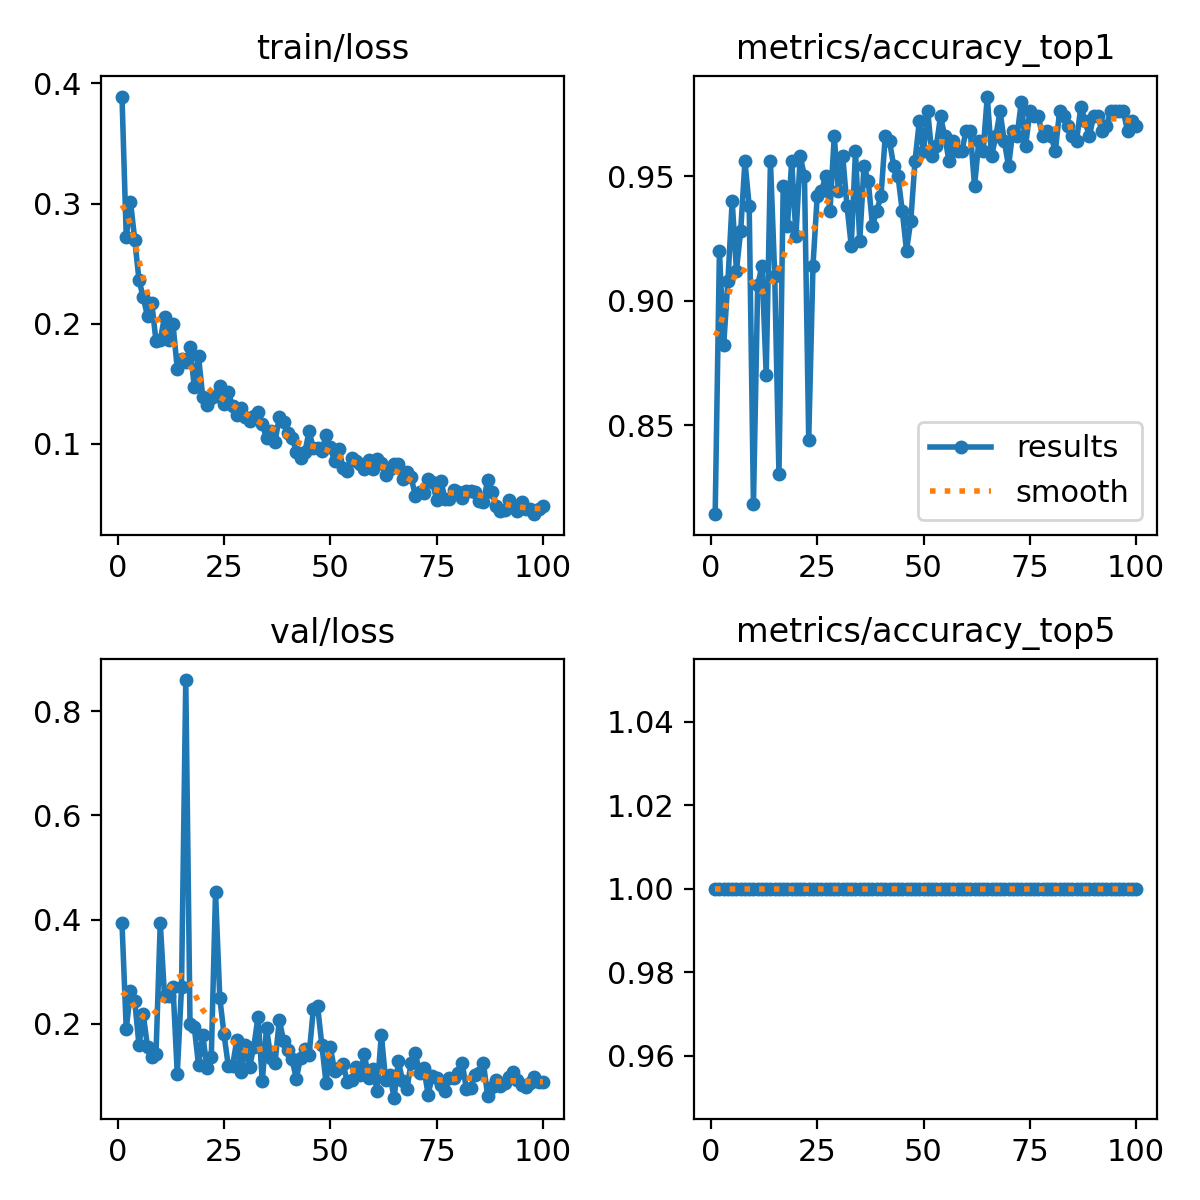

In [ ]:
yolov11n_results2 = '/kaggle/working/runs/classify/train8/results.png'
Image(filename=yolov11n_results2)

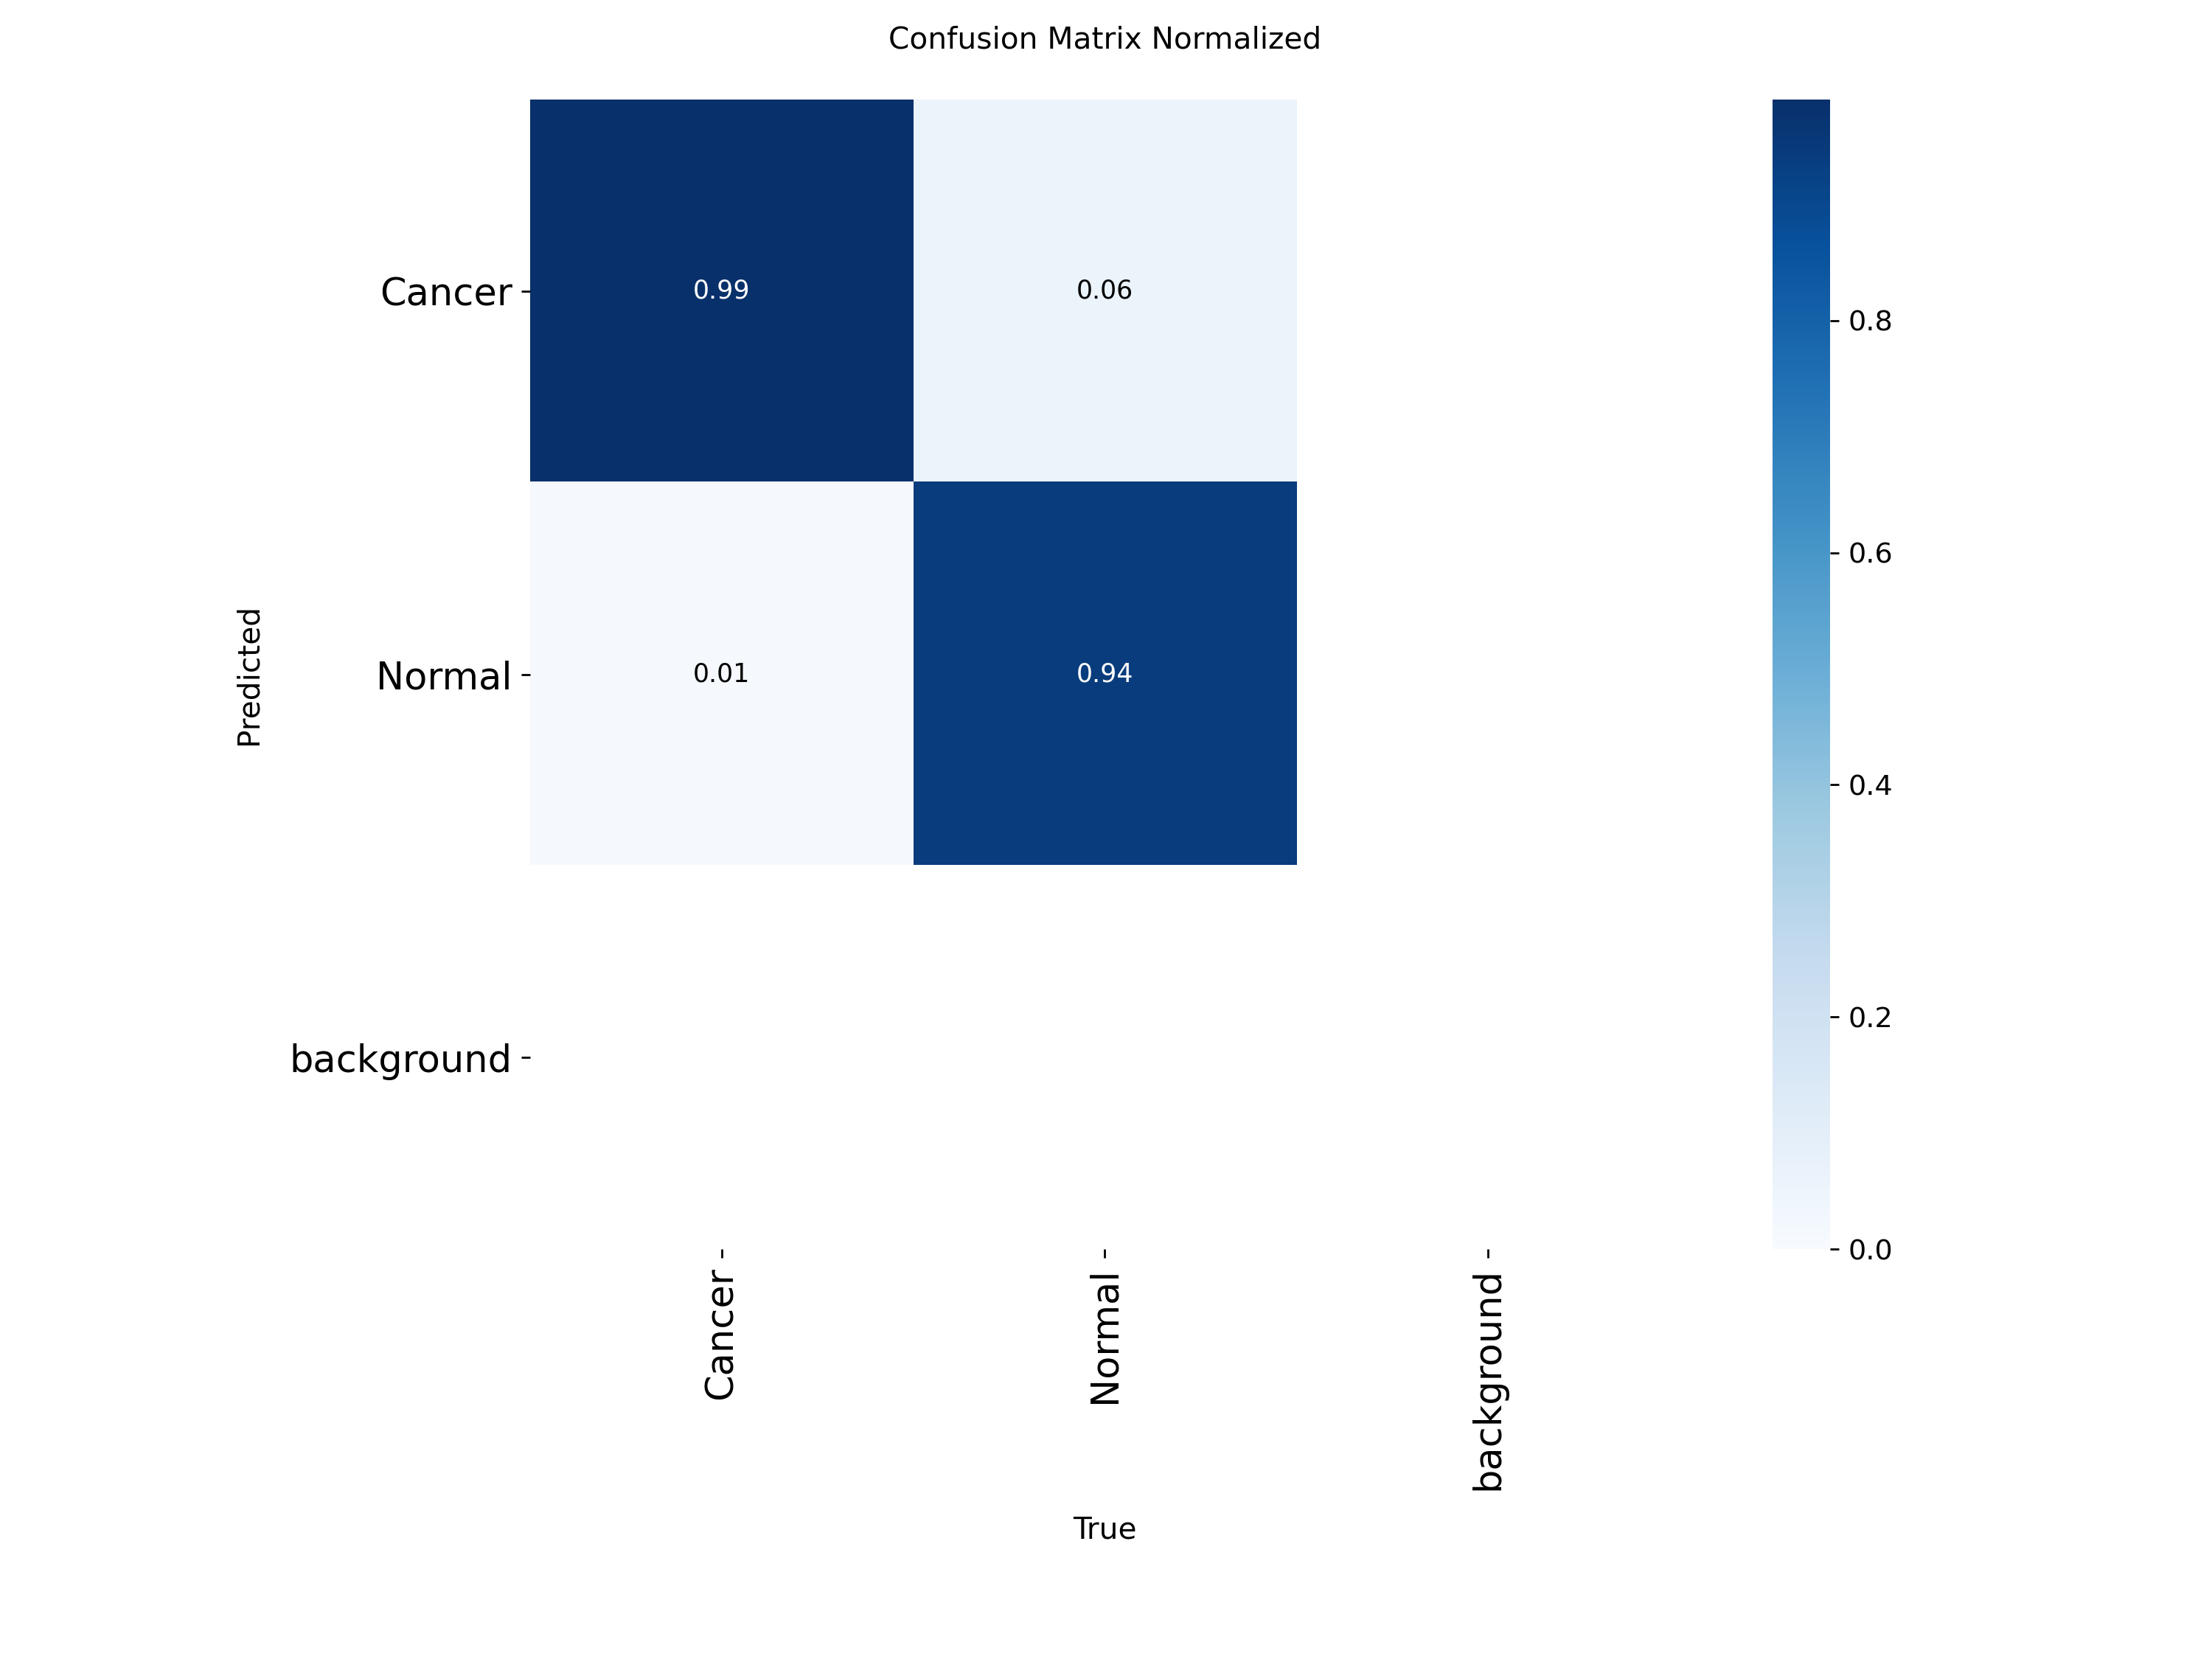

In [ ]:
yolov11n_conf_matrix2 = '/kaggle/working/runs/classify/train8/confusion_matrix_normalized.png'
Image(filename=yolov11n_conf_matrix2)

In [ ]:
#Test the model using the test data
yolov11n_model2.val(data='/kaggle/input/val-data/val_data/data2')

Ultralytics 8.3.249 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
train: /kaggle/input/val-data/val_data/data2/train... found 2352 images in 2 classes ✅ 
val: /kaggle/input/val-data/val_data/data2/val... found 511 images in 2 classes ✅ 
test: None...
val: Fast image access ✅ (ping: 2.2±0.1 ms, read: 203.5±66.2 MB/s, size: 301.6 KB)
val: Scanning /kaggle/input/val-data/val_data/data2/val... 511 images, 0 corrupt: 100% ━━━━━━━━━━━━ 511/511 646.4it/s 0.8s0.1s
WARNING ⚠️ val: Cache directory /kaggle/input/val-data/val_data/data2 is not writable, cache not saved.
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 32/32 18.4it/s 1.7s0.1s
                   all       0.98          1
Speed: 0.2ms preprocess, 0.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /kaggle/working/runs/classify/val8


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x798c66507d30>
curves: []
curves_results: []
fitness: 0.9902152717113495
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.980430543422699, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9902152717113495}
save_dir: PosixPath('/kaggle/working/runs/classify/val8')
speed: {'preprocess': 0.1800405772879536, 'inference': 0.7041111839569819, 'loss': 0.0008976086169659431, 'postprocess': 0.0017409139002856494}
task: 'classify'
top1: 0.980430543422699
top5: 1.0

#YOLOv11s

In [ ]:
# Load YOLOv11s model
yolov11s_model = YOLO("yolo11s-cls.pt")

In [ ]:
yolov11s_training_results  = yolov11s_model.train(data='/kaggle/input/blood-cancer/data2', epochs=50, batch=32, optimizer='SGD', lr0=0.001, augment=True, mosaic=1.0, degrees =45, fliplr=0.5, scale=0.5)

Ultralytics 8.3.249 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/blood-cancer/data2, degrees=45, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train5, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=

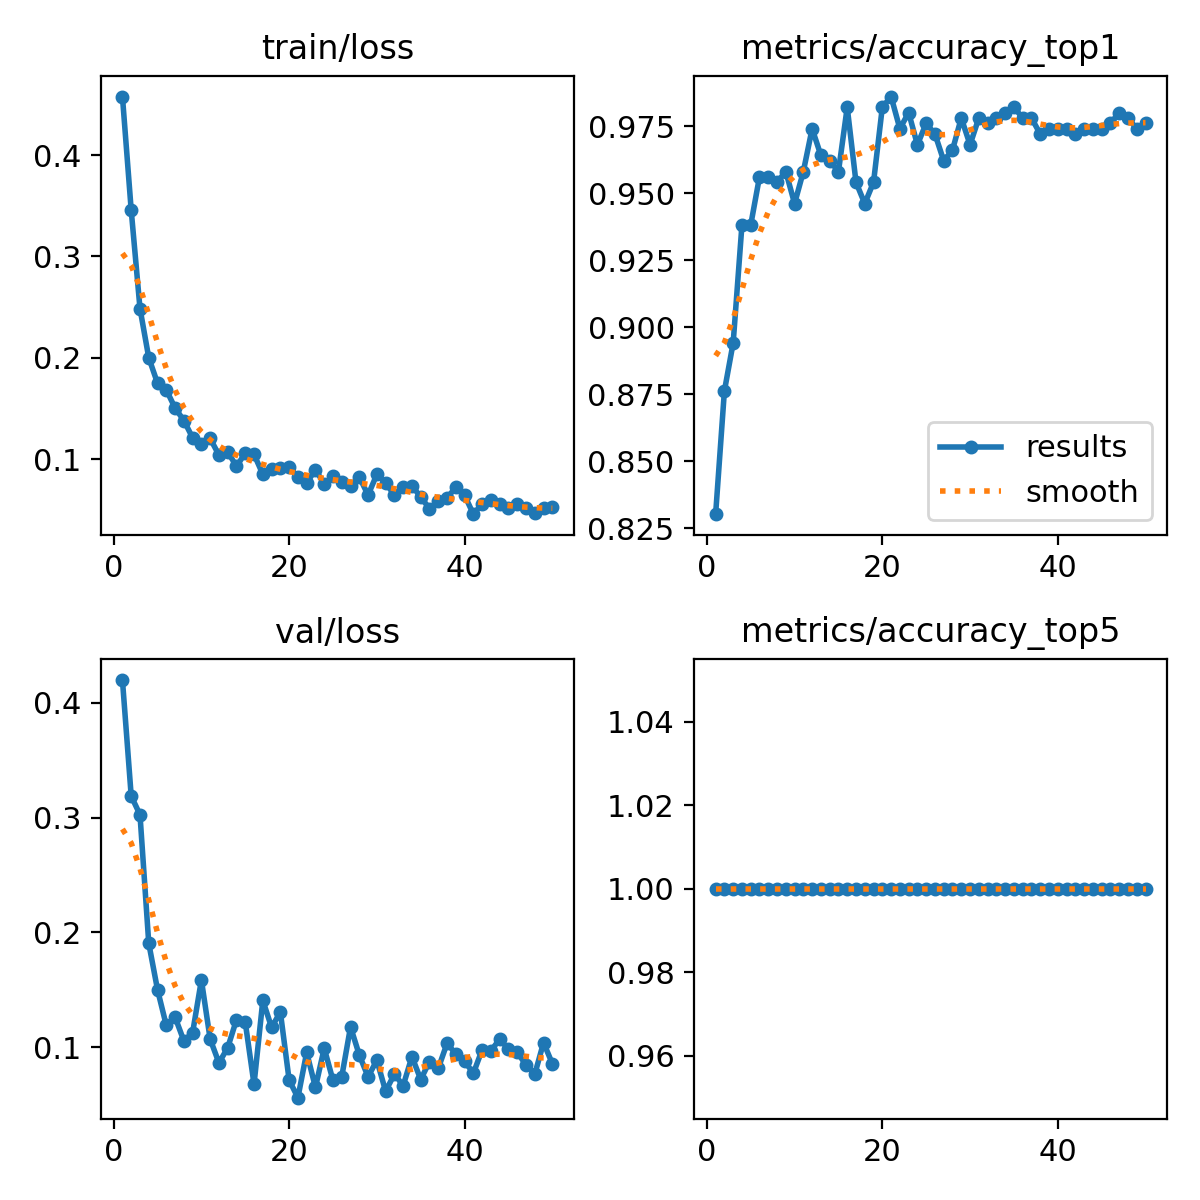

In [ ]:
yolov11s_results = '/kaggle/working/runs/classify/train5/results.png'
Image(filename=yolov11s_results)

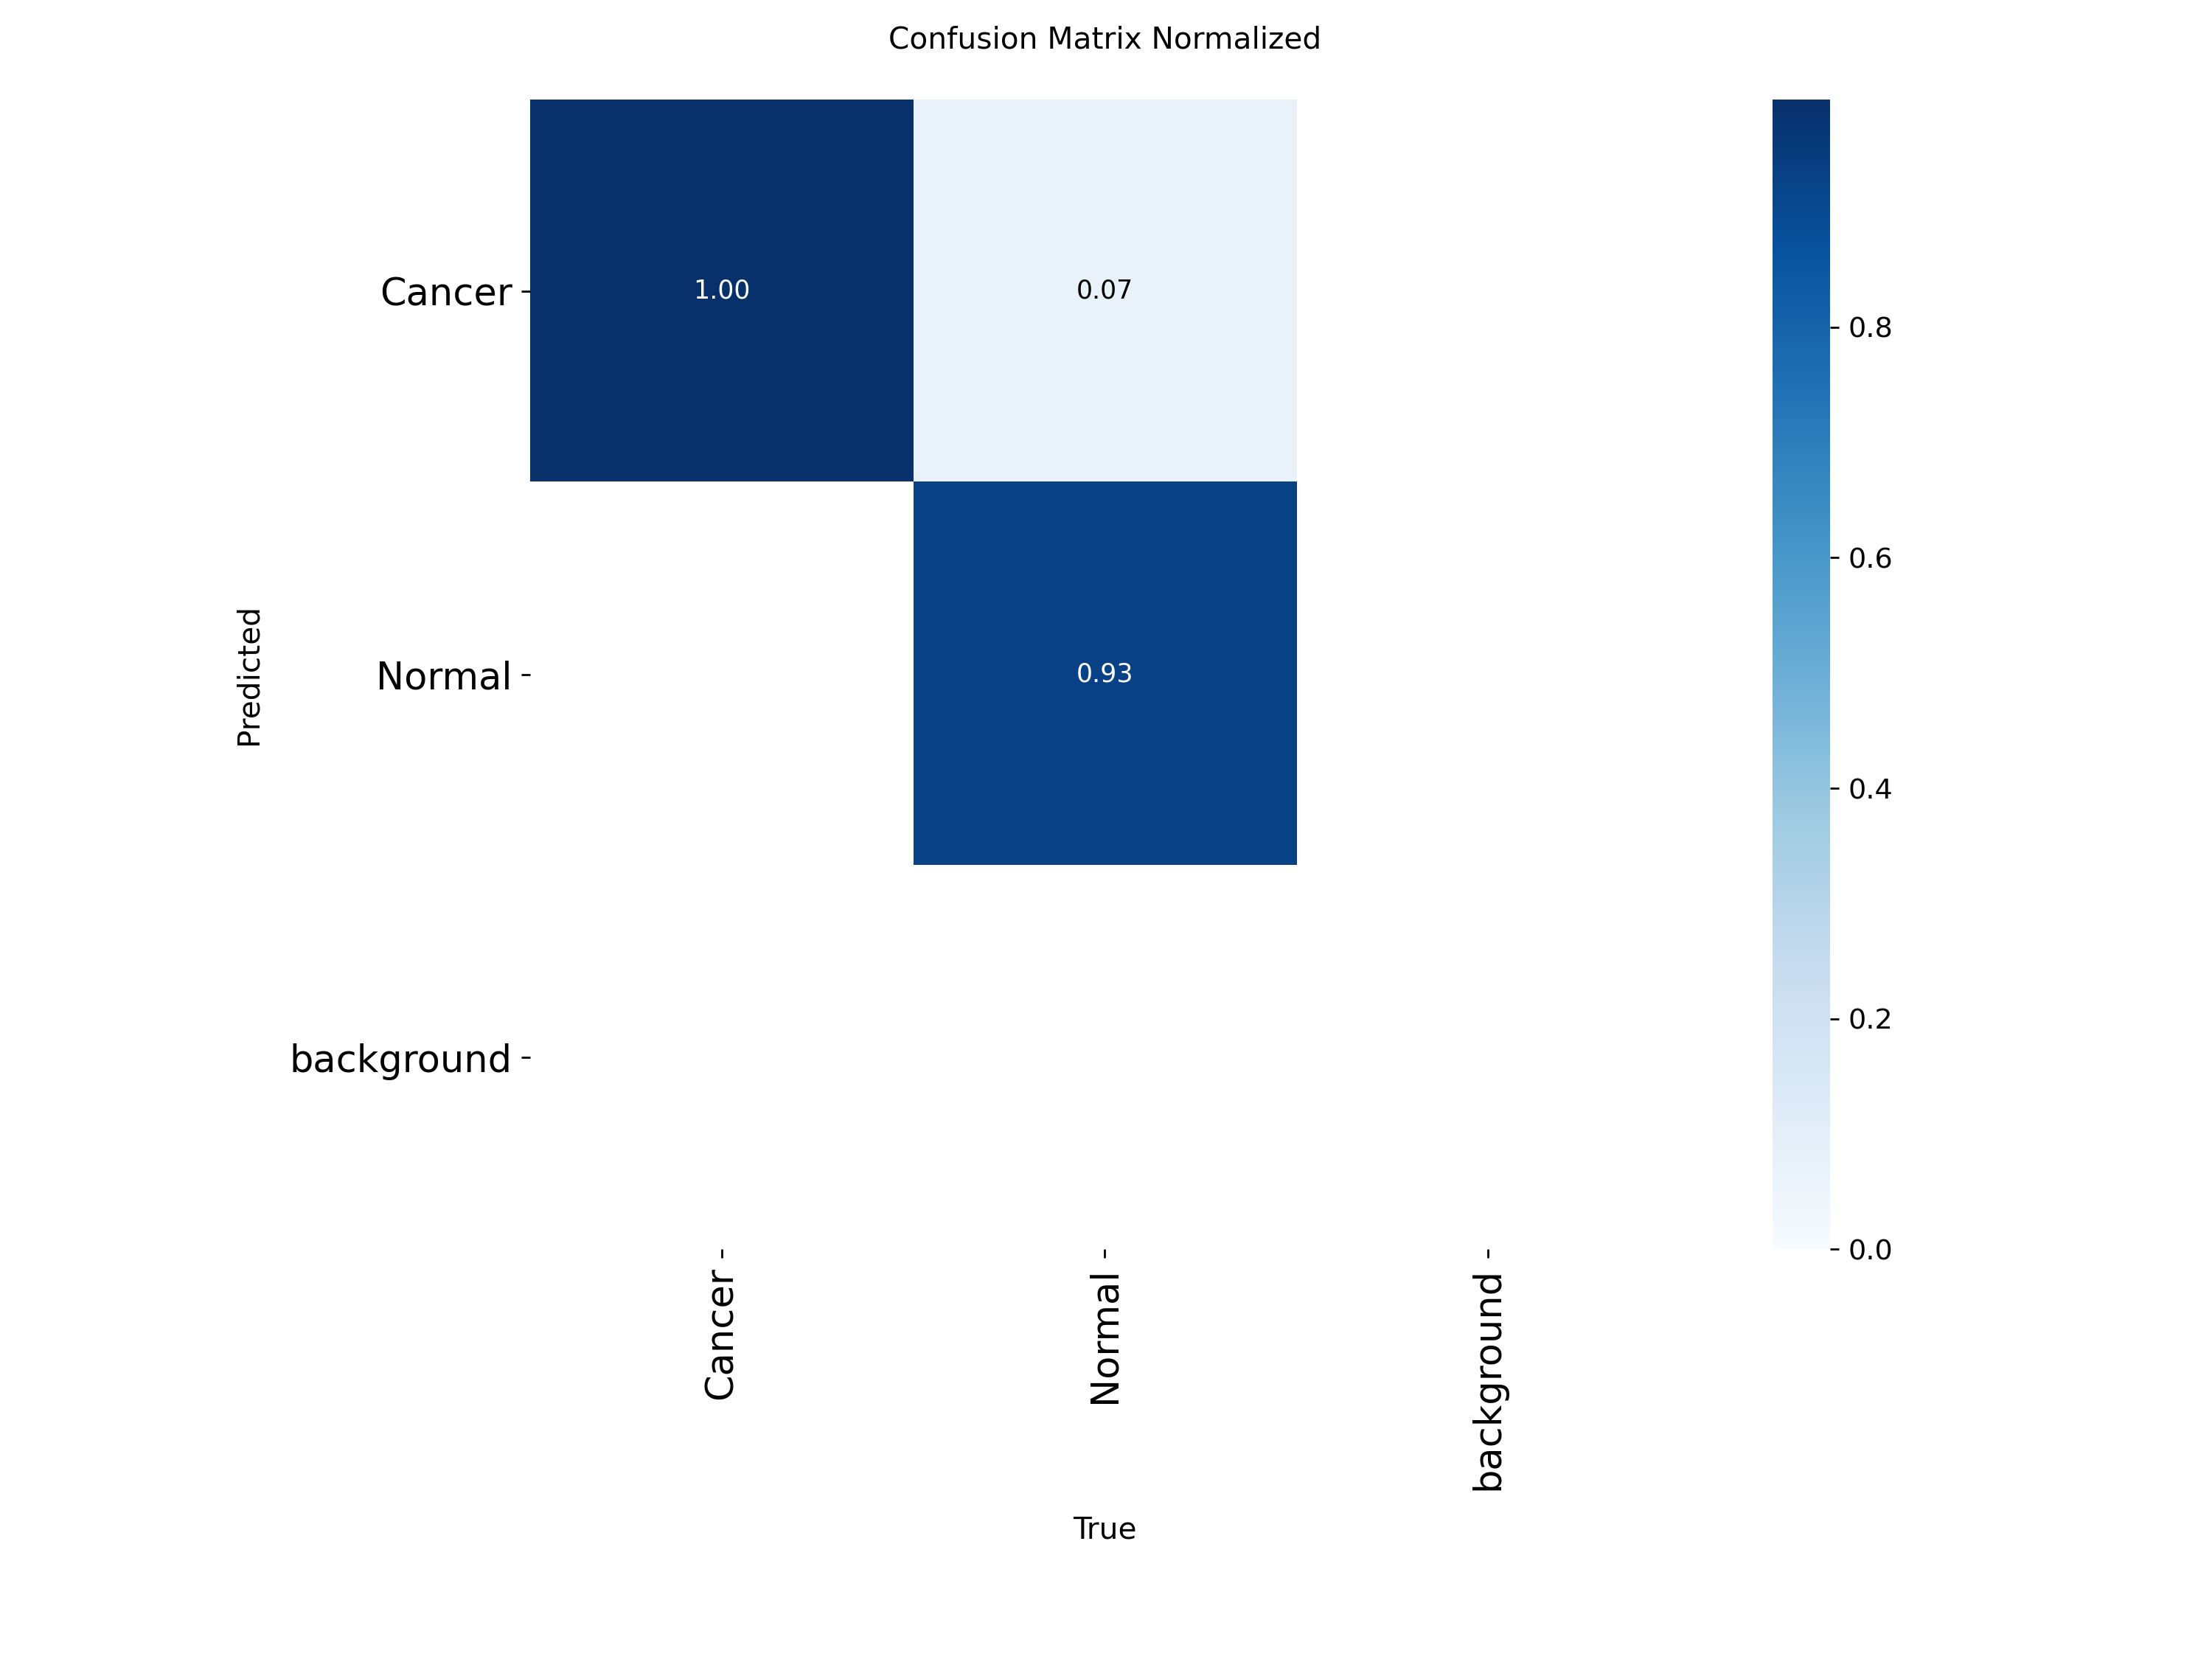

In [ ]:
yolov11s_conf_matrix = '/kaggle/working/runs/classify/train5/confusion_matrix_normalized.png'
Image(filename=yolov11s_conf_matrix)

In [ ]:
yolov11s_model.val(data='/kaggle/input/val-data/val_data/data2')

Ultralytics 8.3.249 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s-cls summary (fused): 47 layers, 5,436,690 parameters, 0 gradients, 12.0 GFLOPs
train: /kaggle/input/val-data/val_data/data2/train... found 2352 images in 2 classes ✅ 
val: /kaggle/input/val-data/val_data/data2/val... found 511 images in 2 classes ✅ 
test: None...
val: Fast image access ✅ (ping: 2.1±0.4 ms, read: 240.1±36.7 MB/s, size: 301.6 KB)
val: Scanning /kaggle/input/val-data/val_data/data2/val... 511 images, 0 corrupt: 100% ━━━━━━━━━━━━ 511/511 671.3it/s 0.8s0.1s
WARNING ⚠️ val: Cache directory /kaggle/input/val-data/val_data/data2 is not writable, cache not saved.
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 32/32 17.8it/s 1.8s0.1s
                   all      0.982          1
Speed: 0.3ms preprocess, 1.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /kaggle/working/runs/classify/val4


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x798ccbf4e7d0>
curves: []
curves_results: []
fitness: 0.9911937415599823
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9823874831199646, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9911937415599823}
save_dir: PosixPath('/kaggle/working/runs/classify/val4')
speed: {'preprocess': 0.25004903718599575, 'inference': 1.2279887612574583, 'loss': 0.0009000880632676192, 'postprocess': 0.013968939331873095}
task: 'classify'
top1: 0.9823874831199646
top5: 1.0

#ResNet50

In [ ]:
train_directory = "/content/data2/data2/train"
val_directory = "/content/data2/data2/val"
test_directory= "/content/data2/data2/test"
BATCH_SIZE = 8
IMG_SIZE = (224, 224)

train_dataset = image_dataset_from_directory(train_directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             seed=42)
validation_dataset = image_dataset_from_directory(val_directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             seed=42)

test_dataset =  image_dataset_from_directory(test_directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             seed=42)



Found 2352 files belonging to 2 classes.
Found 501 files belonging to 2 classes.
Found 511 files belonging to 2 classes.


In [ ]:
def data_augmenter():

    data_augmentation = tf.keras.Sequential([])
    data_augmentation.add(RandomFlip('horizontal'))
    data_augmentation.add(RandomRotation(0.5))
    data_augmentation.add(RandomZoom(.2, .2))

    return data_augmentation
data_augmentation = data_augmenter()

In [ ]:
batch_size = 8
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):
  if shuffle:
    ds = ds.shuffle(1000)

  # Use data augmentation only on the training set.
  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y),
                num_parallel_calls=AUTOTUNE)

  # Use buffered prefetching on all datasets.
  return ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
train_dataset = prepare(train_dataset, shuffle=True, augment=True)
validation_dataset = prepare(validation_dataset)
test_dataset = prepare(test_dataset)

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
#ResNet50

res = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3),
    pooling='avg'
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
# Unfreeze the last 10 layers

for layer in res.layers[-10:]:
    layer.trainable = True

x = Dense(2, activation = 'softmax')(res.output)

model = Model(inputs = res.input , outputs = x)


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy' , optimizer=AdamW(learning_rate=0.001) , metrics = ['accuracy'])

In [ ]:
#ResNet50
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=100,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, min_lr=1e-8
)
    ]
)

Epoch 1/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 126s 159ms/step - accuracy: 0.7948 - loss: 0.7028 - val_accuracy: 0.8403 - val_loss: 3.8671 - learning_rate: 0.0010
Epoch 2/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 40s 130ms/step - accuracy: 0.9059 - loss: 0.2556 - val_accuracy: 0.8104 - val_loss: 0.5963 - learning_rate: 0.0010
Epoch 3/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 39s 127ms/step - accuracy: 0.9071 - loss: 0.2266 - val_accuracy: 0.8303 - val_loss: 2.1321 - learning_rate: 0.0010
Epoch 4/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 42s 129ms/step - accuracy: 0.9058 - loss: 0.2224 - val_accuracy: 0.8423 - val_loss: 0.8040 - learning_rate: 0.0010
Epoch 5/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 41s 130ms/step - accuracy: 0.9328 - loss: 0.1688 - val_accuracy: 0.8064 - val_loss: 1.4642 - learning_rate: 0.0010
Epoch 6/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 40s 124ms/step - accuracy: 0.9234 - loss: 0.1909 - val_accuracy: 0.8782 - val_loss: 0.6178 - learning_rate: 5.0000e-04
Epoch 7/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 43s 130ms/step - a

In [ ]:
#Test the model using the test data
model.evaluate(test_dataset)

64/64 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.9908 - loss: 0.0247


[0.035425979644060135, 0.9843444228172302]

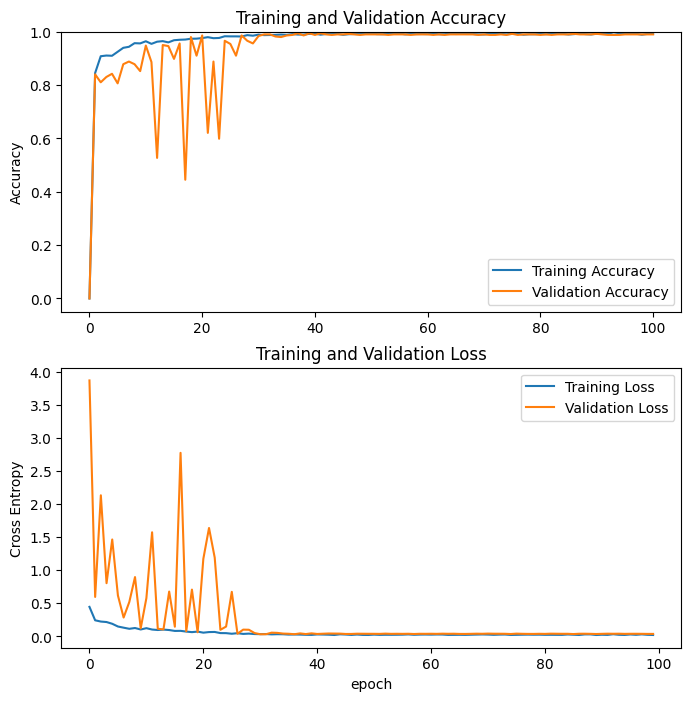

In [ ]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
#The calculated confusion_matrix
confusion_matrix = [[427, 0],
                    [ 6,  78]]

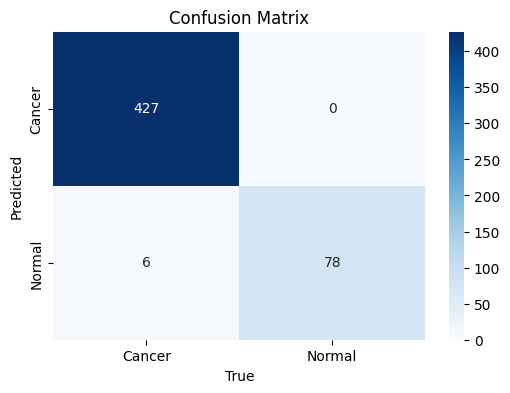

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Cancer", "Normal"], yticklabels=["Cancer", "Normal"])
plt.ylabel('Predicted')
plt.xlabel('True')
plt.title('Confusion Matrix')
plt.show()

#Inception-ResNet-v2

In [ ]:
train_directory = "/content/data2/data2/train"
val_directory = "/content/data2/data2/val"
test_directory= "/content/data2/data2/test"
BATCH_SIZE = 8
IMG_SIZE = (299, 299)

train_dataset = image_dataset_from_directory(train_directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             seed=42)
validation_dataset = image_dataset_from_directory(val_directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             seed=42)

test_dataset =  image_dataset_from_directory(test_directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             seed=42)



Found 2352 files belonging to 2 classes.
Found 501 files belonging to 2 classes.
Found 511 files belonging to 2 classes.


In [ ]:
def data_augmenter():

    data_augmentation = tf.keras.Sequential([])
    data_augmentation.add(RandomFlip('horizontal'))
    data_augmentation.add(RandomRotation(0.5))
    data_augmentation.add(RandomZoom(.2, .2))

    return data_augmentation
data_augmentation = data_augmenter()

In [ ]:
batch_size = 8
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):
  if shuffle:
    ds = ds.shuffle(1000)

  # Use data augmentation only on the training set.
  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y),
                num_parallel_calls=AUTOTUNE)

  # Use buffered prefetching on all datasets.
  return ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
train_dataset = prepare(train_dataset, shuffle=True, augment=True)
validation_dataset = prepare(validation_dataset)
test_dataset = prepare(test_dataset)

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
#RInception-ResNet-V2

incep = tf.keras.applications.InceptionResNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=(299, 299, 3),
    pooling='avg'
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
# Unfreeze the last 10 layers

for layer in incep.layers[-10:]:
    layer.trainable = True

x = Dense(2, activation = 'softmax')(incep.output)

model = Model(inputs = incep.input , outputs = x)


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy' , optimizer=AdamW(learning_rate=0.001) , metrics = ['accuracy'])

In [ ]:
#Inception_ResNet_v2
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=100,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, min_lr=1e-10
)
    ]
)

Epoch 1/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 324s 402ms/step - accuracy: 0.8356 - loss: 0.4864 - val_accuracy: 0.8064 - val_loss: 0.5601 - learning_rate: 0.0010
Epoch 2/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 140s 327ms/step - accuracy: 0.9106 - loss: 0.2252 - val_accuracy: 0.6307 - val_loss: 1.5649 - learning_rate: 0.0010
Epoch 3/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 100s 331ms/step - accuracy: 0.9415 - loss: 0.1529 - val_accuracy: 0.8184 - val_loss: 0.3596 - learning_rate: 0.0010
Epoch 4/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 101s 332ms/step - accuracy: 0.9409 - loss: 0.1544 - val_accuracy: 0.9301 - val_loss: 0.2054 - learning_rate: 0.0010
Epoch 5/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 105s 346ms/step - accuracy: 0.9528 - loss: 0.1267 - val_accuracy: 0.9242 - val_loss: 0.1984 - learning_rate: 0.0010
Epoch 6/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 143s 348ms/step - accuracy: 0.9636 - loss: 0.1155 - val_accuracy: 0.8443 - val_loss: 0.9055 - learning_rate: 0.0010
Epoch 7/100
294/294 ━━━━━━━━━━━━━━━━━━━━ 137s 329ms/step -

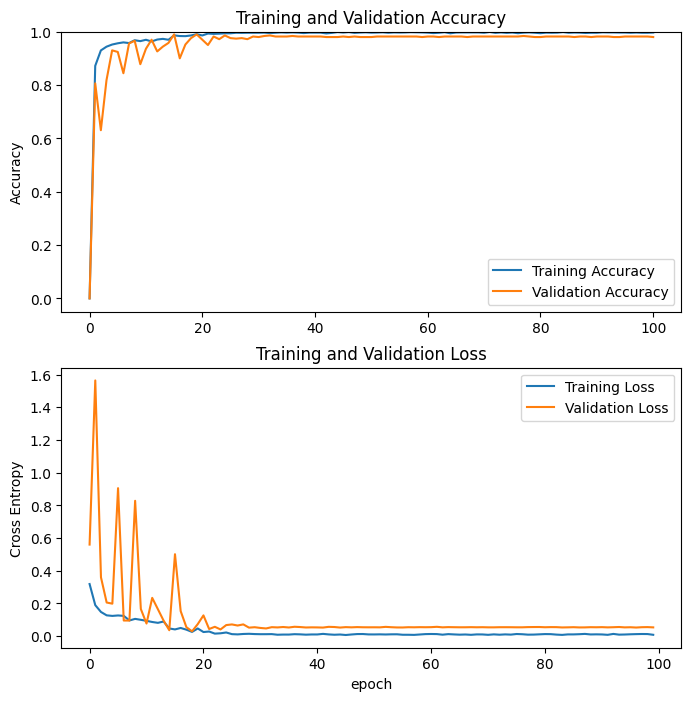

In [ ]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
#Test the model using the test data
model.evaluate(test_dataset)

64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 315ms/step - accuracy: 0.9976 - loss: 0.0136


[0.030737819150090218, 0.9921721816062927]

In [ ]:
#The calculated confusion_matrix
confusion_matrix = [[427, 0],
                    [ 9,  75]]

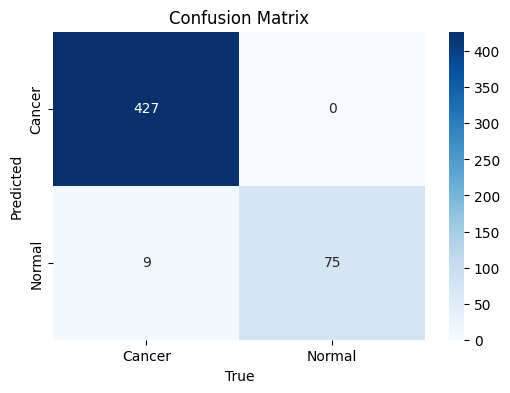

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Cancer", "Normal"], yticklabels=["Cancer", "Normal"])
plt.ylabel('Predicted')
plt.xlabel('True')
plt.title('Confusion Matrix')
plt.show()